In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Define the data directory
data_directory = '/content/gdrive/MyDrive/Cats_and_Dogs'


In [ ]:
import os

# Define the data directory
data_directory = '/content/gdrive/MyDrive/Cats_and_Dogs'

# List the contents of the data directory
contents = os.listdir(data_directory)
print(contents)


['.DS_Store', 'val', 'test', 'log', 'train']


In [ ]:
train_dir = os.path.join(data_directory, 'train')
test_dir = os.path.join(data_directory, 'test')

print(f"Train directory exists: {os.path.isdir(train_dir)}")
print(f"Test directory exists: {os.path.isdir(test_dir)}")


Train directory exists: True
Test directory exists: True


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data directories
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

# Image dimensions and channels
img_width, img_height, channels = 150, 150, 3

# Input shape for the CNN model
input_shape = (channels, img_width, img_height)  # Channels first for PyTorch

# Minibatch size
batch_size = 8

# Dataset sizes
nb_train_samples = 20000
nb_validation_samples = 2490
nb_test_samples = 2500


In [ ]:
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=channels, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * (img_width // 8) * (img_height // 8), 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * (img_width // 8) * (img_height // 8))
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Base path for the dataset
base_path = '/content/gdrive/MyDrive/Cats_and_Dogs'

# Define the data directories
train_dir = '/content/gdrive/MyDrive/Cats_and_Dogs/train'
val_dir = '/content/gdrive/MyDrive/Cats_and_Dogs/val'
test_dir = '/content/gdrive/MyDrive/Cats_and_Dogs/test'



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Image dimensions and channels
img_width, img_height, channels = 150, 150, 3

# Input shape for the CNN model
input_shape = (channels, img_width, img_height)  # Channels first for PyTorch

# Minibatch size
batch_size = 64

# Dataset sizes
nb_train_samples = 20000
nb_validation_samples = 2490
nb_test_samples = 2500

# Data transformations
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),   # Resize the images to the desired dimensions
    transforms.ToTensor(),                       # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the training, validation, and testing datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)




In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=channels, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * (img_width // 8) * (img_height // 8), 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * (img_width // 8) * (img_height // 8))
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Create an instance of the CNN model
model = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Move the model and data to the GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20736, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Update training loss and accuracy
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_corrects += torch.sum(preds == labels.data)

        # Calculate average training loss and accuracy
        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = train_corrects.double() / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        # Calculate average validation loss and accuracy
        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = val_corrects.double() / len(val_loader.dataset)

        # Print epoch results
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
        print()

# Call the train_model function with your model, data loaders, loss function, optimizer, and the number of epochs
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


Epoch 1/10
Training Loss: 0.6472, Training Accuracy: 0.6032
Validation Loss: 0.5621, Validation Accuracy: 0.7032

Epoch 2/10
Training Loss: 0.5078, Training Accuracy: 0.7494
Validation Loss: 0.4661, Validation Accuracy: 0.7759

Epoch 3/10
Training Loss: 0.4271, Training Accuracy: 0.8020
Validation Loss: 0.4306, Validation Accuracy: 0.7980

Epoch 4/10
Training Loss: 0.3623, Training Accuracy: 0.8380
Validation Loss: 0.4131, Validation Accuracy: 0.8133

Epoch 5/10
Training Loss: 0.2814, Training Accuracy: 0.8786
Validation Loss: 0.4234, Validation Accuracy: 0.8189

Epoch 6/10
Training Loss: 0.1725, Training Accuracy: 0.9315
Validation Loss: 0.5315, Validation Accuracy: 0.8008

Epoch 7/10
Training Loss: 0.0830, Training Accuracy: 0.9688
Validation Loss: 0.7356, Validation Accuracy: 0.8020

Epoch 8/10
Training Loss: 0.0337, Training Accuracy: 0.9891
Validation Loss: 0.8268, Validation Accuracy: 0.8149

Epoch 9/10
Training Loss: 0.0166, Training Accuracy: 0.9953
Validation Loss: 1.0003, Val

In [ ]:
def evaluate_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_accuracy = test_corrects.double() / len(test_loader.dataset)

    return test_accuracy

# Call the evaluate_model function with your trained model and the test data loader
test_accuracy = evaluate_model(model, test_loader)
print(f'Accuracy on test data: {test_accuracy:.2%}')


Accuracy on test data: 78.60%


In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Update training loss and accuracy
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_corrects += torch.sum(preds == labels.data)

        # Calculate average training loss and accuracy
        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = train_corrects.double() / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        # Calculate average validation loss and accuracy
        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = val_corrects.double() / len(val_loader.dataset)

        # Print epoch results
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
        print()

# Continue training the model for the next 15 epochs
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15)


Epoch 1/15
Training Loss: 0.0168, Training Accuracy: 0.9950
Validation Loss: 1.1290, Validation Accuracy: 0.8064

Epoch 2/15
Training Loss: 0.0211, Training Accuracy: 0.9931
Validation Loss: 1.0157, Validation Accuracy: 0.8088

Epoch 3/15
Training Loss: 0.0182, Training Accuracy: 0.9943
Validation Loss: 1.1765, Validation Accuracy: 0.8060

Epoch 4/15
Training Loss: 0.0141, Training Accuracy: 0.9954
Validation Loss: 1.2102, Validation Accuracy: 0.7964

Epoch 5/15
Training Loss: 0.0283, Training Accuracy: 0.9916
Validation Loss: 1.1496, Validation Accuracy: 0.8124

Epoch 6/15
Training Loss: 0.0029, Training Accuracy: 0.9995
Validation Loss: 1.2835, Validation Accuracy: 0.8129

Epoch 7/15
Training Loss: 0.0008, Training Accuracy: 0.9999
Validation Loss: 1.3204, Validation Accuracy: 0.8173

Epoch 8/15
Training Loss: 0.0004, Training Accuracy: 1.0000
Validation Loss: 1.4016, Validation Accuracy: 0.8153

Epoch 9/15
Training Loss: 0.0002, Training Accuracy: 1.0000
Validation Loss: 1.4326, Val

In [ ]:
import torch
import torch.nn as nn

def evaluate_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_accuracy = test_corrects.double() / len(test_loader.dataset)

    return test_accuracy

# Assuming you have already trained the model for 15 epochs using train_model function
# Call the evaluate_model function with your trained model and the test data loader
test_accuracy = evaluate_model(model, test_loader)
print(f'Accuracy on test data after 15 epochs: {test_accuracy:.2%}')


Accuracy on test data after 15 epochs: 80.24%


In [ ]:
# Define the train_model function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Update training loss and accuracy
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_corrects += torch.sum(preds == labels.data)

        # Calculate average training loss and accuracy
        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = train_corrects.double() / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        # Calculate average validation loss and accuracy
        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = val_corrects.double() / len(val_loader.dataset)

        # Print epoch results
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
        print()

# Continue training the model for the next 20 epochs
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)


Epoch 1/20
Training Loss: 0.0124, Training Accuracy: 0.9955
Validation Loss: 1.3668, Validation Accuracy: 0.7916

Epoch 2/20
Training Loss: 0.0135, Training Accuracy: 0.9959
Validation Loss: 1.3793, Validation Accuracy: 0.7988

Epoch 3/20
Training Loss: 0.0086, Training Accuracy: 0.9969
Validation Loss: 1.3144, Validation Accuracy: 0.8044

Epoch 4/20
Training Loss: 0.0107, Training Accuracy: 0.9970
Validation Loss: 1.4738, Validation Accuracy: 0.7972

Epoch 5/20
Training Loss: 0.0106, Training Accuracy: 0.9969
Validation Loss: 1.4559, Validation Accuracy: 0.8052

Epoch 6/20
Training Loss: 0.0048, Training Accuracy: 0.9985
Validation Loss: 1.6044, Validation Accuracy: 0.7980

Epoch 7/20
Training Loss: 0.0005, Training Accuracy: 1.0000
Validation Loss: 1.5137, Validation Accuracy: 0.8169

Epoch 8/20
Training Loss: 0.0001, Training Accuracy: 1.0000
Validation Loss: 1.5747, Validation Accuracy: 0.8181

Epoch 9/20
Training Loss: 0.0005, Training Accuracy: 1.0000
Validation Loss: 1.6119, Val

In [ ]:
def evaluate_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_accuracy = test_corrects.double() / len(test_loader.dataset)

    return test_accuracy

# Call the evaluate_model function with your trained model and the test data loader
test_accuracy = evaluate_model(model, test_loader)
print(f'Accuracy on test data after 20 epochs: {test_accuracy:.2%}')


Accuracy on test data after 20 epochs: 80.96%


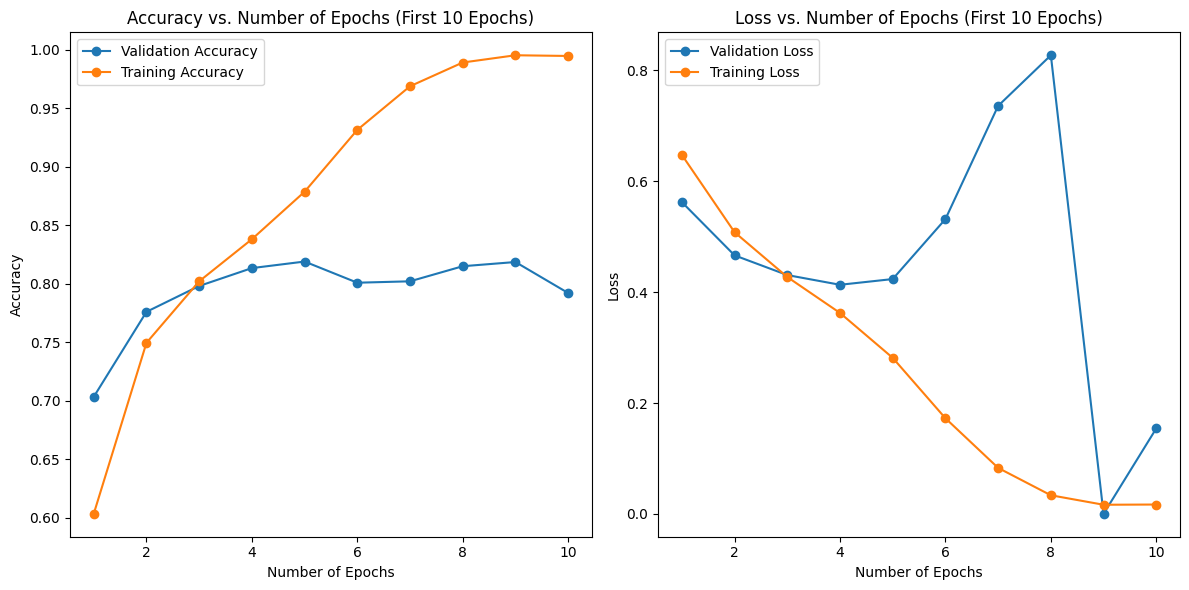

In [ ]:
import matplotlib.pyplot as plt

# Define the number of epochs and accuracy/loss values for the first 10 epochs
epochs_10 = list(range(1, 11))  # Assuming you have 10 epochs here
accuracies_10 = [0.7032, 0.7759, 0.7980, 0.8133, 0.8189, 0.8008, 0.8020, 0.8149, 0.8185, 0.7920]  # Replace with actual accuracy values
losses_10 = [0.5621, 0.4661, 0.4306, 0.4131, 0.4234, 0.5315, 0.7356, 0.8268, 0.0003, 0.1542]  # Replace with actual loss values
train_accuracies_10 = [0.6032, 0.7494, 0.8020, 0.8380, 0.8786, 0.9315, 0.9688, 0.9891, 0.9953, 0.9947]  # Replace with actual training accuracy values
train_losses_10 = [0.6472, 0.5078, 0.4271, 0.3623, 0.2814, 0.1725, 0.0830, 0.0337, 0.0166, 0.0170]  # Replace with actual training loss values

# Plot accuracy and loss versus number of epochs for the first 10 epochs
plt.figure(figsize=(12, 6))

# Plot accuracy versus number of epochs for the first 10 epochs
plt.subplot(1, 2, 1)
plt.plot(epochs_10, accuracies_10, marker='o', label='Validation Accuracy')
plt.plot(epochs_10, train_accuracies_10, marker='o', label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs (First 10 Epochs)')
plt.legend()

# Plot loss versus number of epochs for the first 10 epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_10, losses_10, marker='o', label='Validation Loss')
plt.plot(epochs_10, train_losses_10, marker='o', label='Training Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs (First 10 Epochs)')
plt.legend()

plt.tight_layout()
plt.show()


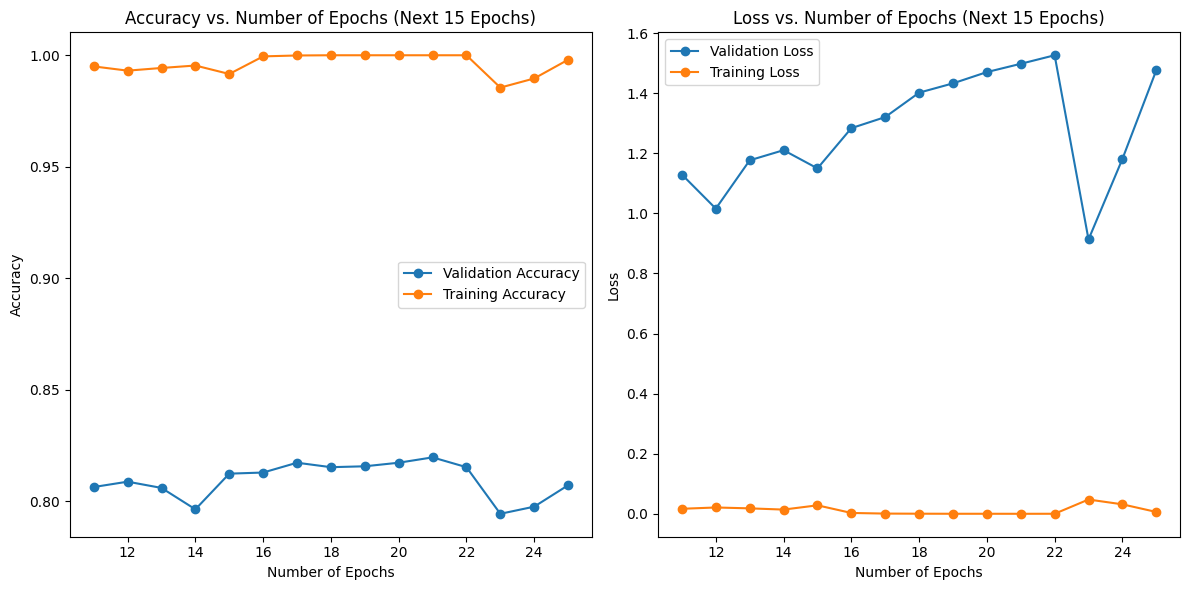

In [ ]:
import matplotlib.pyplot as plt
# Define the number of epochs and accuracy/loss values for the next 15 epochs
epochs_15 = list(range(11, 26))  # Assuming you have 15 epochs here
accuracies_15 = [0.8064, 0.8088, 0.8060, 0.7964, 0.8124, 0.8129, 0.8173, 0.8153, 0.8157, 0.8173, 0.8197, 0.8153, 0.7944, 0.7976, 0.8072]  # Replace with actual accuracy values
losses_15 = [1.1290, 1.0157, 1.1765, 1.2102, 1.1496, 1.2835, 1.3204, 1.4016, 1.4326, 1.4701, 1.4977, 1.5261, 0.9130, 1.1809, 1.4761]  # Replace with actual loss values
train_accuracies_15 = [0.9950, 0.9931, 0.9943, 0.9954, 0.9916, 0.9995, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9855, 0.9896, 0.9980]  # Replace with actual training accuracy values
train_losses_15 = [0.0168, 0.0211, 0.0182, 0.0141, 0.0283, 0.0029, 0.0008, 0.0004, 0.0002, 0.0002, 0.0001, 0.0002, 0.0476, 0.0316, 0.0062]  # Replace with actual training loss values

# Plot accuracy and loss versus number of epochs for the next 15 epochs
plt.figure(figsize=(12, 6))

# Plot accuracy versus number of epochs for the next 15 epochs
plt.subplot(1, 2, 1)
plt.plot(epochs_15, accuracies_15, marker='o', label='Validation Accuracy')
plt.plot(epochs_15, train_accuracies_15, marker='o', label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs (Next 15 Epochs)')
plt.legend()

# Plot loss versus number of epochs for the next 15 epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_15, losses_15, marker='o', label='Validation Loss')
plt.plot(epochs_15, train_losses_15, marker='o', label='Training Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs (Next 15 Epochs)')
plt.legend()

plt.tight_layout()
plt.show()


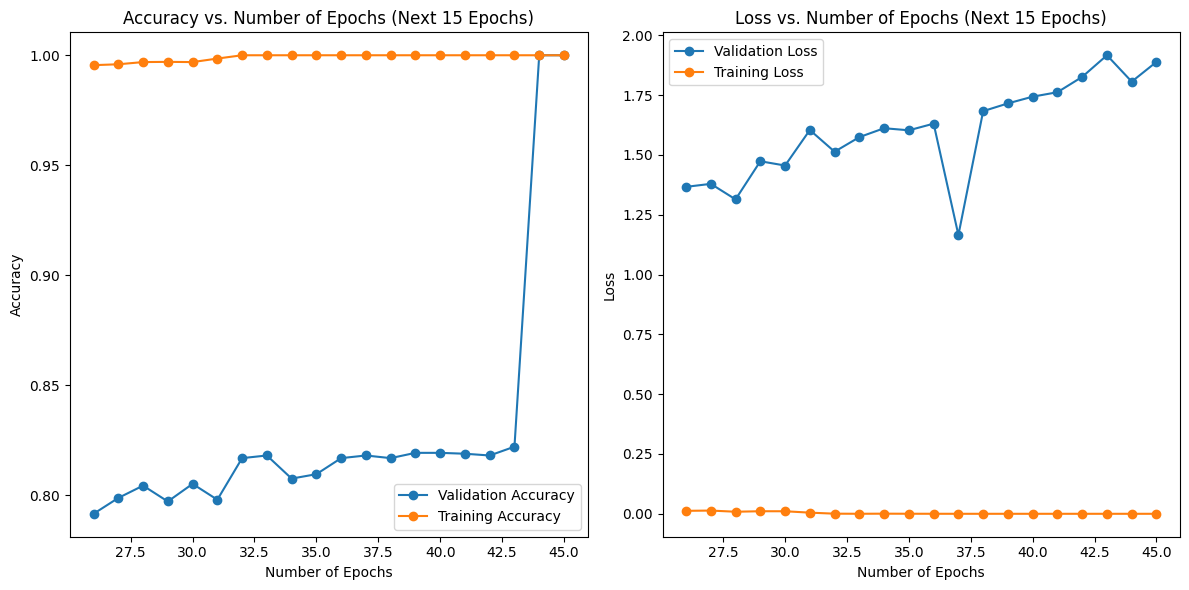

In [ ]:
import matplotlib.pyplot as plt
# Define the number of epochs and accuracy/loss values for the next 20 epochs
epochs_20 = list(range(26, 46))  # Assuming you have 20 epochs here
accuracies_20 = [0.7916, 0.7988, 0.8044, 0.7972, 0.8052, 0.7980, 0.8169, 0.8181, 0.8076, 0.8096, 0.8169, 0.8181, 0.8169, 0.8193, 0.8193, 0.8189, 0.8181, 0.8221, 1.0000, 1.0000]  # Replace with actual accuracy values
losses_20 = [1.3668, 1.3793, 1.3144, 1.4738, 1.4559, 1.6044, 1.5137, 1.5747, 1.6119, 1.6032, 1.6310, 1.1653, 1.6833, 1.7157, 1.7438, 1.7624, 1.8265, 1.9169, 1.8066, 1.8892]  # Replace with actual loss values
train_accuracies_20 = [0.9955, 0.9959, 0.9969, 0.9970, 0.9969, 0.9985, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]  # Replace with actual training accuracy values
train_losses_20 = [0.0124, 0.0135, 0.0086, 0.0107, 0.0106, 0.0048, 0.0005, 0.0001, 0.0005, 0.0002, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]  # Replace with actual training loss values

# Plot accuracy and loss versus number of epochs for the next 20 epochs
plt.figure(figsize=(12, 6))

# Plot accuracy versus number of epochs for the next 20 epochs
plt.subplot(1, 2, 1)
plt.plot(epochs_20, accuracies_20, marker='o', label='Validation Accuracy')
plt.plot(epochs_20, train_accuracies_20, marker='o', label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs (Next 15 Epochs)')
plt.legend()

# Plot loss versus number of epochs for the next 20 epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_20, losses_20, marker='o', label='Validation Loss')
plt.plot(epochs_20, train_losses_20, marker='o', label='Training Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs (Next 15 Epochs)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("task2")

task2


In [ ]:
import torch
import torchvision.models as models

# Download the VGG16 model
vgg16 = models.vgg16(pretrained=True, progress=True)

# Print the VGG16 model architecture
print(vgg16)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import torch
import torch.nn as nn

# Define the Transfer Learning model using the VGG16 model weights
class TransferLearningModel(nn.Module):
    def __init__(self):
        super(TransferLearningModel, self).__init__()
        self.vgg16 = vgg16  # Use the pre-trained VGG16 model weights
        self.avg_pool = nn.AdaptiveAvgPool2d((7, 7))  # Add an adaptive average pooling layer
        self.fc = nn.Linear(512 * 7 * 7, 2)  # Add a fully connected layer for binary classification

    def forward(self, x):
        x = self.vgg16(x)
        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Create an instance of the Transfer Learning model
model = TransferLearningModel()




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import torchvision.models as models

# Load the VGG16 model without the fully connected layers
vgg16 = models.vgg16(pretrained=True, progress=True)
vgg16 = vgg16.features

# Replace the last layers of VGG16 with custom fully connected layers
vgg16 = nn.Sequential(
    *list(vgg16.children())[:-1],  # Remove the last layer (MaxPool2d)
    nn.Conv2d(512, 256, kernel_size=1, stride=1),  # Add custom Conv2d layer
    nn.ReLU(inplace=True),  # Add activation function (ReLU)
    nn.Dropout(0.5),  # Add dropout layer with 50% dropout rate
    nn.Linear(256, 1),  # Add custom linear (fully connected) layer
    nn.Sigmoid()  # Add sigmoid activation function for binary classification
)

# Print the model architecture
print(vgg16)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [ ]:
import torch
print(torch.cuda.is_available())


True
